#                                                        SVM Concepts


---



## 1. dot product

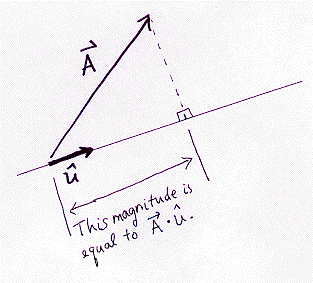

## 2. maximizing width (derivation of objective function)

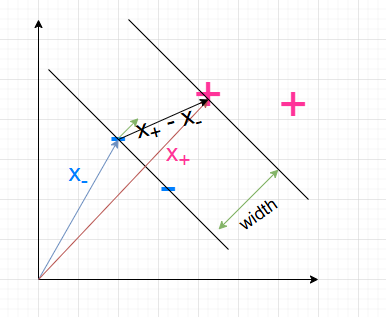

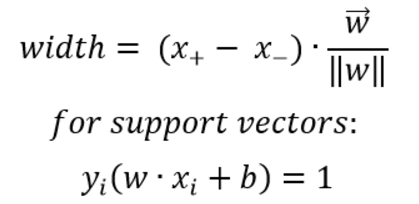

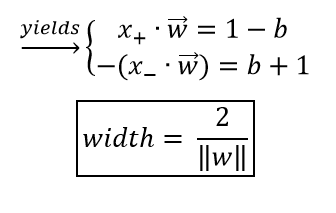

## 3. Objective Function

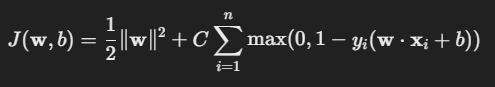

multiply lamda = 1/C

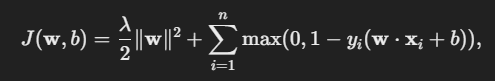

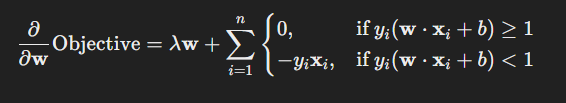

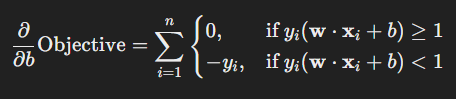

## 4. Gradient Descent

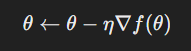

# Version 1: from scratch

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [7]:
class SVM:
  def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
    self.lr = learning_rate
    self.lambda_param = lambda_param
    self.n_iters = n_iters
    self.w = None
    self.b = None

  def fit(self, X, y):
    n_samples, n_features = X.shape

    y_ = np.where(y <= 0, -1, 1)

    self.w = np.zeros(n_features)
    self.b = 0

    for _ in range(self.n_iters):
      for idx, x_i in enumerate(X):
        condition = y_[idx] * (np.dot(x_i, self.w)+self.b) >= 1
        if condition:
          self.w -= self.lr * (self.lambda_param * self.w)
        else:
          self.w -= self.lr * (self.lambda_param * self.w - np.dot(x_i, y_[idx]))
          self.b -= self.lr * (-1*y_[idx])

  def predict(self, X):
    approx = np.dot(X, self.w) + self.b
    return np.sign(approx)


## equation of a hyperplane:
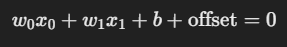

In [8]:
def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred) / len(y_true)
  return accuracy


def visualize_svm():
  def get_hyperplane_value(x, w, b, offset):
    return (-w[0] * x + b + offset) / w[1]

  fig = plt.figure()
  ax = fig.add_subplot(1, 1, 1)
  plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

  x_min = np.min(X[:, 0])
  x_max = np.max(X[:, 0])


  x1_1 = get_hyperplane_value(x_min, clf.w, clf.b, 0)
  x1_2 = get_hyperplane_value(x_max, clf.w, clf.b, 0)

  x1_1_m = get_hyperplane_value(x_min, clf.w, clf.b, -1)
  x1_2_m = get_hyperplane_value(x_max, clf.w, clf.b, -1)

  x1_1_p = get_hyperplane_value(x_min, clf.w, clf.b, 1)
  x1_2_p = get_hyperplane_value(x_max, clf.w, clf.b, 1)


  ax.plot([x_min, x_max], [x1_1, x1_2], "y--")
  ax.plot([x_min, x_max], [x1_1_m, x1_2_m], "k")
  ax.plot([x_min, x_max], [x1_1_p, x1_2_p], "k")


  x1_min = np.min(X[:, 1])
  x1_max = np.max(X[:, 1])

  ax.set_ylim([x1_min-3, x1_max+3])
  plt.show()

In [9]:
X, y = datasets.make_blobs(
    n_samples = 50, n_features = 2, centers = 2, cluster_std=1.05, random_state = 40
)



In [10]:
y = np.where(y==0, -1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)


clf = SVM()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print("SVM Accuracy: ", accuracy(y_test, predictions))

SVM Accuracy:  1.0


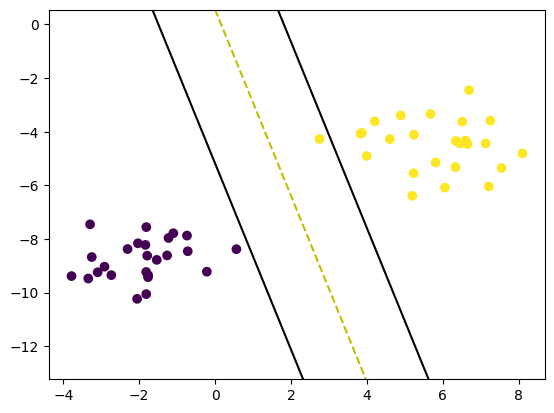

In [11]:
visualize_svm()

# Version 2: using library (2 class, 2 feature)





In [ ]:
from sklearn.svm import SVC


In [ ]:
X, y = datasets.make_blobs(
    n_samples = 200, n_features = 2, centers = 2, cluster_std=1.05, random_state = 40
)

y = np.where(y==0, -1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)


clf2 = SVC()
clf2.fit(X_train, y_train)

# Predict and evaluate the One-vs-One model
y_pred = clf2.predict(X_test)

In [ ]:
print("SVM Accuracy: ", accuracy(y_test, y_pred))

SVM Accuracy:  1.0


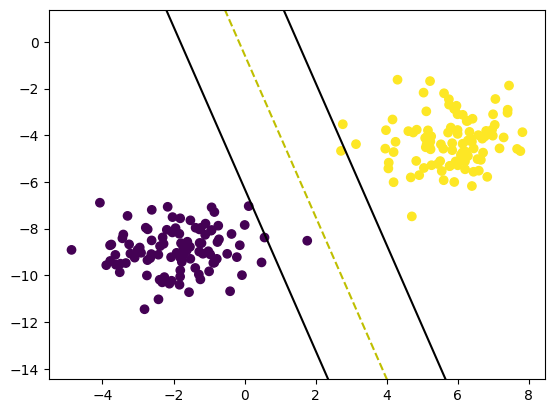

In [ ]:
visualize_svm()

# Version 3: using library (multi class, multi feature)





In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [ ]:
wine = datasets.load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
import pandas as pd
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# Add the target column
df['target'] = wine.target

# Display the DataFrame
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
X, y = wine.data, wine.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
svm_ovo = SVC(decision_function_shape='ovo')
# svm_ovr = SVC(decision_function_shape='ovr')
svm_ovo.fit(X_train, y_train)

# Predict and evaluate the One-vs-One model
y_pred_ovo = svm_ovo.predict(X_test)
print("One-vs-One Accuracy:", accuracy_score(y_test, y_pred_ovo))

One-vs-One Accuracy: 0.7592592592592593


In [ ]:
# Get indices of support vectors
support_indices = svm_ovo.support_
print("Indices of Support Vectors:", support_indices)

# Get the number of support vectors for each class
n_support = svm_ovo.n_support_
print("Number of Support Vectors for Each Class:", n_support)

Indices of Support Vectors: [  3   5  14  15  26  28  29  31  32  37  43  64  71  99 118   1   2   8
  16  27  30  34  35  36  38  39  40  47  48  53  55  66  72  74  75  76
  79  82  86  93  98 102 113 114 115 116 120 122 123   0   6   9  13  17
  20  23  33  41  42  45  46  51  52  54  60  62  73  77  78  83  84  87
  88  89  90  95 101 104 105 108 109 110 117]
Number of Support Vectors for Each Class: [15 34 34]


Confusion Matrix:
 [[19  0  0]
 [ 0 19  2]
 [ 0 11  3]]


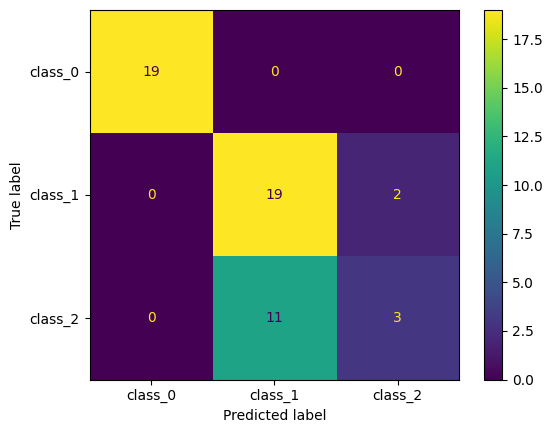

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_ovo)

# Display the confusion matrix
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=wine.target_names)
disp.plot(cmap="viridis")

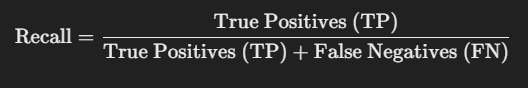

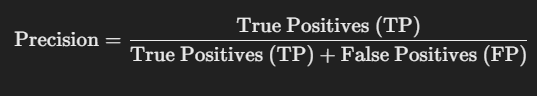

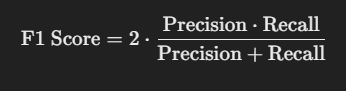

In [ ]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_test, y_pred_ovo, target_names=wine.target_names)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       0.63      0.90      0.75        21
     class_2       0.60      0.21      0.32        14

    accuracy                           0.76        54
   macro avg       0.74      0.71      0.69        54
weighted avg       0.75      0.76      0.72        54



## plot 3D decision boundary

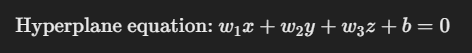

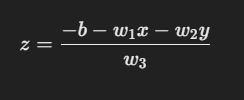

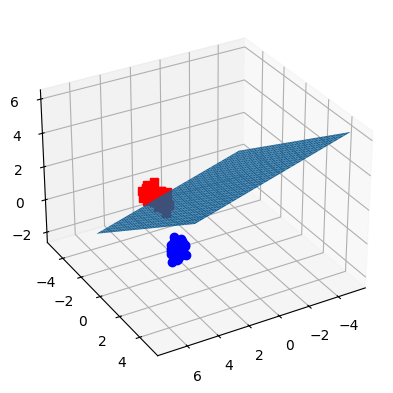

In [ ]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from mpl_toolkits.mplot3d import Axes3D

iris = datasets.load_iris()
X = iris.data[:, :3]  # we only take the first three features.
Y = iris.target

#make it binary classification problem
X = X[np.logical_or(Y==0,Y==1)]
Y = Y[np.logical_or(Y==0,Y==1)]

model = svm.SVC(kernel='linear')
clf = model.fit(X, Y)

# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]

tmp = np.linspace(-5,5,30) # Creates 30 evenly spaced values between -5 and 5 for both x any coordinates

x,y = np.meshgrid(tmp,tmp) #for 2D: Generates a 2D grid of x any y values


fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
ax.plot_surface(x, y, z(x,y))
ax.view_init(30, 60)
plt.show()


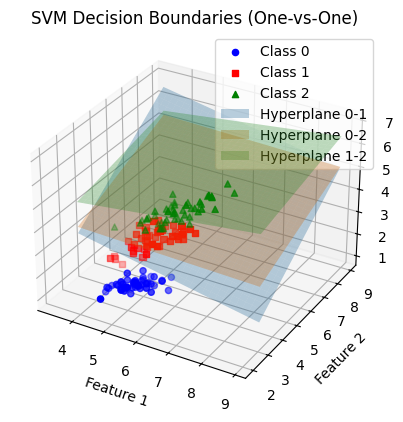

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :3]  # Use the first three features for 3D plotting
Y = iris.target       # Use all three classes

# Filter to include samples from classes 0, 1, and 2
X = X[Y != 3]  # Ensure only valid classes are included if modifying beyond this dataset
Y = Y[Y != 3]

# Train SVM for each pair of classes (One-vs-One strategy)
svm_models = {}
class_pairs = [(0, 1), (0, 2), (1, 2)]  # All combinations of class pairs
for class_a, class_b in class_pairs:
    # Filter the dataset for the current class pair
    X_pair = X[(Y == class_a) | (Y == class_b)]
    Y_pair = Y[(Y == class_a) | (Y == class_b)]
    # Convert class labels to binary: 0 and 1
    Y_pair = np.where(Y_pair == class_a, 0, 1)

    # Train an SVM with a linear kernel
    model = svm.SVC(kernel='linear')
    model.fit(X_pair, Y_pair)

    # Store the trained model for this pair of classes
    svm_models[(class_a, class_b)] = model

# Create a lambda function for the separating hyperplane
def get_hyperplane_equation(model):
    return lambda x, y: (-model.intercept_[0] - model.coef_[0][0] * x - model.coef_[0][1] * y) / model.coef_[0][2]

# Prepare a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data points for all three classes
colors = ['blue', 'red', 'green']
markers = ['o', 's', '^']
for class_idx, color, marker in zip(range(3), colors, markers):
    ax.scatter(
        X[Y == class_idx, 0],
        X[Y == class_idx, 1],
        X[Y == class_idx, 2],
        color=color,
        marker=marker,
        label=f'Class {class_idx}'
    )

# Generate a grid for plotting hyperplanes
tmp = np.linspace(np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1, 30)
x, y = np.meshgrid(tmp, tmp)

# Plot hyperplanes for each pair of classes
for (class_a, class_b), model in svm_models.items():
    z = get_hyperplane_equation(model)
    ax.plot_surface(x, y, z(x, y), alpha=0.3, label=f'Hyperplane {class_a}-{class_b}')

# Customize plot
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('SVM Decision Boundaries (One-vs-One)')
ax.legend()
plt.show()


# Kernels

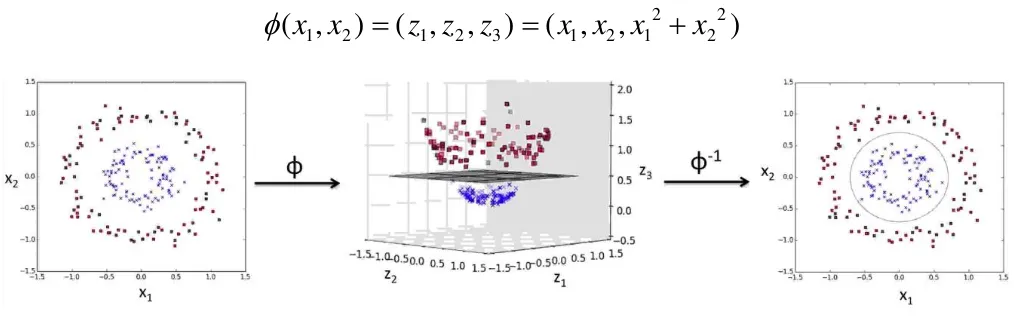

### linear kernel:

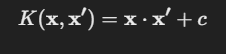

<ipython-input-50-fbaa709ca40b>:60: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axes[i].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', marker='x', label='Test')
<ipython-input-50-fbaa709ca40b>:60: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axes[i].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', marker='x', label='Test')
<ipython-input-50-fbaa709ca40b>:60: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axes[i].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', marker='x', 

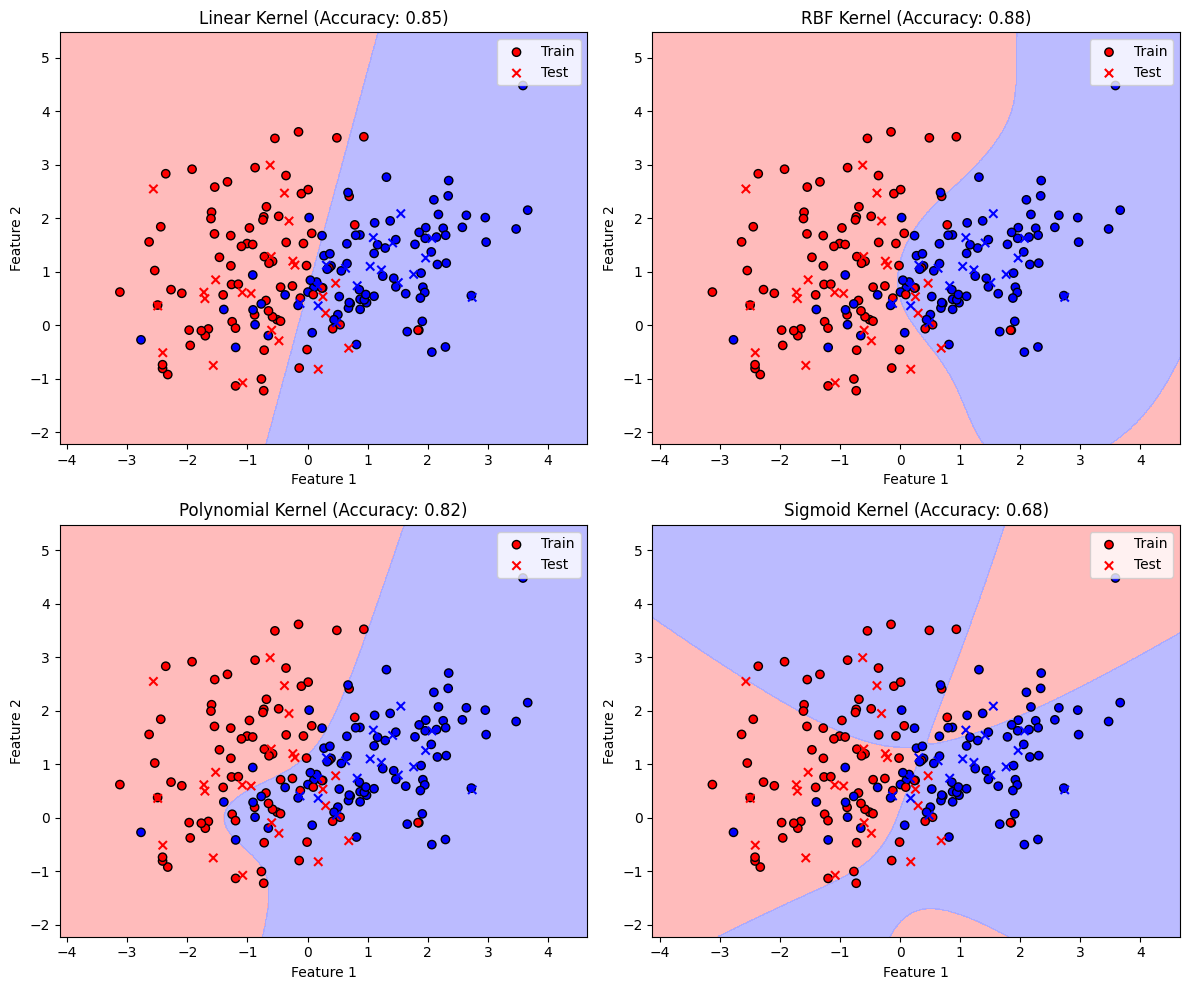

Accuracies for different kernels:
Linear Kernel: 0.85
Rbf Kernel: 0.88
Poly Kernel: 0.82
Sigmoid Kernel: 0.68


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# Generate a toy dataset for binary classification
X, y = make_classification(
    n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42
)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define kernels to compare
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
kernel_names = ['Linear Kernel', 'RBF Kernel', 'Polynomial Kernel', 'Sigmoid Kernel']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()  # Flatten the 2D grid of axes into 1D for easy iteration

# Define a colormap for plotting
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

# Store accuracies
accuracies = {}

# Iterate over kernels
for i, kernel in enumerate(kernels):
    # Train SVM with the current kernel
    model = SVC(kernel=kernel, gamma='auto', degree=3)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[kernel] = accuracy

    # Create a mesh grid for plotting decision boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict for each point in the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundaries
    axes[i].contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light)
    # Plot training points
    axes[i].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', label='Train')
    # Plot test points
    axes[i].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', marker='x', label='Test')

    # Set titles and labels
    axes[i].set_title(f'{kernel_names[i]} (Accuracy: {accuracy:.2f})')
    axes[i].set_xlim(xx.min(), xx.max())
    axes[i].set_ylim(yy.min(), yy.max())
    axes[i].set_xlabel('Feature 1')
    axes[i].set_ylabel('Feature 2')
    axes[i].legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

# Print accuracies for all kernels
print("Accuracies for different kernels:")
for kernel, acc in accuracies.items():
    print(f"{kernel.capitalize()} Kernel: {acc:.2f}")


# References


[machine learning from scratch](https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqbm1QcjFjMEs1OFJKbENzYUhLNm81Wk1HT2JsUXxBQ3Jtc0ttUVFxNUFzb2M4SzdQaDBWV3VfNlRqOXFtbVREZWNMd1BrZUplc2ZiRV9kbEpZZDVVRS11d0QyMi0xZWJDYzV5aU9OQ3RNRVhzUlVRVTRuU3JsU2JzemNxa2cyX1RkYzZYSnhITGRJX1VILWZrdzdKSQ&q=https%3A%2F%2Fgithub.com%2FAssemblyAI-Examples%2FMachine-Learning-From-Scratch&v=T9UcK-TxQGw)


[learning svm](https://youtu.be/_PwhiWxHK8o?si=zBkGqSo9KFV0Dkmu)



[plot 3d](https://stackoverflow.com/questions/36232334/plotting-3d-decision-boundary-from-linear-svm)





